In [245]:
import os
import librosa
import _pickle as cPickle
from scipy.io.wavfile import read
from pathlib import Path
import warnings
import numpy as np
from sklearn import preprocessing
import python_speech_features as mfcc
from sklearn import metrics
from keras.utils import to_categorical

In [246]:
train_file ="C:\\Users\\B43E\\python\\py\\data\\f_list\\wav_list_train.txt"    
test_file ="C:\\Users\\B43E\\python\\py\\data\\f_list\\wav_list_test.txt" 
def calculate_delta(array):
    """Calculate and returns the delta of given feature vector matrix"""

    rows,cols = array.shape
    deltas = np.zeros((rows,20))
    N = 2
    for i in range(rows):
        index = []
        j = 1
        while j <= N:
            if i-j < 0:
                first = 0
            else:
                first = i-j
            if i+j > rows -1:
                second = rows -1
            else:
                second = i+j
            index.append((second,first))
            j+=1
        deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
    return deltas

def extract_features(audio,rate):
    """extract 20 dim mfcc features from an audio, performs CMS and combines 
    delta to make it 40 dim feature vector"""    
    
    mfcc_feat = mfcc.mfcc(audio,rate, 0.025, 0.01,20,appendEnergy = True)
    
    mfcc_feat = preprocessing.scale(mfcc_feat)
    delta = calculate_delta(mfcc_feat)
    combined = np.hstack((mfcc_feat,delta)) 
    return combined
def get_features(file_path): 
    file_paths = open(file_path,'r')
    features_normalize = []
    total_feature = []
    features = np.asarray(())
    for path in file_paths:    
        path = path.strip()
        file_name=os.path.basename(path)
        audio, sr1 = librosa.load(path, sr=44100)
        data=librosa.resample(audio, sr1, 16000)
        vector   = extract_features(data,16000)
        if features.size == 0:
            features = vector
       
        else:
            features = np.vstack((features, vector)) 

        total_feature.append(features)
    return total_feature

In [247]:
def extract_label(file_path): 
    file_paths = open(file_path,'r')
    features_normalize = []
    total_feature = []
    labels = []
    features = np.asarray(())
    for path in file_paths:    
        path = path.strip()
        file_name=os.path.basename(path)
        audio, sr1 = librosa.load(path, sr=44100)
        data=librosa.resample(audio, sr1, 16000)
        vector   = extract_features(data,16000)

        if features.size == 0:
            features = vector

        
        else:
            features = np.vstack((features, vector))


        file_name=os.path.basename(path)

        split_filename=file_name.split('_')

        molecule_name=split_filename[0]

        for r in range(features.shape[0]):

            labels.append(molecule_name)
       
    return labels



In [249]:
from sklearn.preprocessing import LabelEncoder
# Extract features from the training data 
extracted_features_train = get_features(train_file) 
final_features_train = np.vstack(extracted_features_train)
# Extract features from the testing data 
extracted_features_test = get_features(test_file) 
final_features_test = np.vstack(extracted_features_test) 
# Extract labels from the training data 
train_label_value = extract_label(train_file)
train_final_label = np.array(train_label_value)
#print(train_label_value)
# Extract labels from the testing data 
test_label_value = extract_label(test_file)
test_final_label = np.array(test_label_value)
#print(test_final_label)
#print(test_final_label.shape)
x_train = final_features_train
x_test = final_features_test
#print(x_train)
#print(x_test)
y_train = train_final_label 
y_test =  test_final_label
#print(y_train)
#print(y_test)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test  = label_encoder.fit_transform(y_test)
#print(y_train)
#print(y_test)
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
#print(y_train_hot)
#print(y_test_hot)

[0 0 0 ... 1 1 1]


In [254]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, input_dim=40,activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) 
history=model.fit(x_train, y_train_hot, batch_size=1000, epochs=2500, verbose=1, validation_data=(x_test, y_test_hot))

Train on 23335 samples, validate on 23335 samples
Epoch 1/2500
23335/23335 [==============================] - 1s 27us/step - loss: 0.6520 - accuracy: 0.6566 - val_loss: 0.6438 - val_accuracy: 0.6582
Epoch 2/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.6435 - accuracy: 0.6582 - val_loss: 0.6433 - val_accuracy: 0.6582
Epoch 3/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.6432 - accuracy: 0.6582 - val_loss: 0.6431 - val_accuracy: 0.6582
Epoch 4/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.6431 - accuracy: 0.6582 - val_loss: 0.6429 - val_accuracy: 0.6582
Epoch 5/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.6430 - accuracy: 0.6582 - val_loss: 0.6428 - val_accuracy: 0.6582
Epoch 6/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.6428 - accuracy: 0.6582 - val_loss: 0.6427 - val_accuracy: 0.6582
Epoch 7/2500
23335/23335 [==============================] - 0

23335/23335 [==============================] - 0s 8us/step - loss: 0.6224 - accuracy: 0.6582 - val_loss: 0.6218 - val_accuracy: 0.6582
Epoch 56/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.6204 - accuracy: 0.6582 - val_loss: 0.6192 - val_accuracy: 0.6582
Epoch 57/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.6184 - accuracy: 0.6582 - val_loss: 0.6173 - val_accuracy: 0.6582
Epoch 58/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.6161 - accuracy: 0.6582 - val_loss: 0.6146 - val_accuracy: 0.6582
Epoch 59/2500
23335/23335 [==============================] - 0s 12us/step - loss: 0.6136 - accuracy: 0.6582 - val_loss: 0.6121 - val_accuracy: 0.6582
Epoch 60/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.6109 - accuracy: 0.6582 - val_loss: 0.6094 - val_accuracy: 0.6582
Epoch 61/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.6083 - accuracy: 0.6581 - val_loss

Epoch 110/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5430 - accuracy: 0.6552 - val_loss: 0.5426 - val_accuracy: 0.6573
Epoch 111/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5424 - accuracy: 0.6591 - val_loss: 0.5428 - val_accuracy: 0.6575
Epoch 112/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5421 - accuracy: 0.6562 - val_loss: 0.5415 - val_accuracy: 0.6572
Epoch 113/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5416 - accuracy: 0.6552 - val_loss: 0.5410 - val_accuracy: 0.6570
Epoch 114/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5410 - accuracy: 0.6561 - val_loss: 0.5407 - val_accuracy: 0.6571
Epoch 115/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5406 - accuracy: 0.6567 - val_loss: 0.5401 - val_accuracy: 0.6571
Epoch 116/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5402 - accuracy:

23335/23335 [==============================] - 0s 9us/step - loss: 0.5250 - accuracy: 0.6575 - val_loss: 0.5244 - val_accuracy: 0.6572
Epoch 165/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5244 - accuracy: 0.6553 - val_loss: 0.5254 - val_accuracy: 0.6576
Epoch 166/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5244 - accuracy: 0.6558 - val_loss: 0.5237 - val_accuracy: 0.6573
Epoch 167/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5240 - accuracy: 0.6569 - val_loss: 0.5244 - val_accuracy: 0.6575
Epoch 168/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5238 - accuracy: 0.6565 - val_loss: 0.5233 - val_accuracy: 0.6572
Epoch 169/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5236 - accuracy: 0.6568 - val_loss: 0.5230 - val_accuracy: 0.6573
Epoch 170/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.5233 - accuracy: 0.6562 - val_

23335/23335 [==============================] - 0s 8us/step - loss: 0.5145 - accuracy: 0.6577 - val_loss: 0.5142 - val_accuracy: 0.6575
Epoch 219/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5143 - accuracy: 0.6593 - val_loss: 0.5139 - val_accuracy: 0.6574
Epoch 220/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5143 - accuracy: 0.6561 - val_loss: 0.5136 - val_accuracy: 0.6574
Epoch 221/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.5143 - accuracy: 0.6555 - val_loss: 0.5136 - val_accuracy: 0.6572
Epoch 222/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5140 - accuracy: 0.6570 - val_loss: 0.5134 - val_accuracy: 0.6575
Epoch 223/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5138 - accuracy: 0.6552 - val_loss: 0.5133 - val_accuracy: 0.6573
Epoch 224/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5137 - accuracy: 0.6567 - val_

Epoch 273/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5083 - accuracy: 0.6574 - val_loss: 0.5079 - val_accuracy: 0.6573
Epoch 274/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5084 - accuracy: 0.6567 - val_loss: 0.5090 - val_accuracy: 0.6576
Epoch 275/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5084 - accuracy: 0.6543 - val_loss: 0.5079 - val_accuracy: 0.6572
Epoch 276/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5081 - accuracy: 0.6553 - val_loss: 0.5087 - val_accuracy: 0.6572
Epoch 277/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5079 - accuracy: 0.6580 - val_loss: 0.5086 - val_accuracy: 0.6577
Epoch 278/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5080 - accuracy: 0.6554 - val_loss: 0.5076 - val_accuracy: 0.6575
Epoch 279/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.5079 - accuracy

23335/23335 [==============================] - 0s 7us/step - loss: 0.5045 - accuracy: 0.6566 - val_loss: 0.5039 - val_accuracy: 0.6574
Epoch 328/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5044 - accuracy: 0.6588 - val_loss: 0.5039 - val_accuracy: 0.6574
Epoch 329/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5044 - accuracy: 0.6575 - val_loss: 0.5041 - val_accuracy: 0.6577
Epoch 330/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5042 - accuracy: 0.6565 - val_loss: 0.5041 - val_accuracy: 0.6573
Epoch 331/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5042 - accuracy: 0.6568 - val_loss: 0.5038 - val_accuracy: 0.6573
Epoch 332/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5041 - accuracy: 0.6555 - val_loss: 0.5040 - val_accuracy: 0.6577
Epoch 333/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5040 - accuracy: 0.6556 - val_l

Epoch 382/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5016 - accuracy: 0.6586 - val_loss: 0.5013 - val_accuracy: 0.6573
Epoch 383/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5014 - accuracy: 0.6574 - val_loss: 0.5009 - val_accuracy: 0.6576
Epoch 384/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.5012 - accuracy: 0.6591 - val_loss: 0.5008 - val_accuracy: 0.6576
Epoch 385/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.5015 - accuracy: 0.6557 - val_loss: 0.5008 - val_accuracy: 0.6575
Epoch 386/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5011 - accuracy: 0.6577 - val_loss: 0.5017 - val_accuracy: 0.6578
Epoch 387/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5013 - accuracy: 0.6581 - val_loss: 0.5008 - val_accuracy: 0.6576
Epoch 388/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.5013 - accuracy:

23335/23335 [==============================] - 0s 9us/step - loss: 0.4991 - accuracy: 0.6549 - val_loss: 0.4992 - val_accuracy: 0.6575
Epoch 437/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4990 - accuracy: 0.6555 - val_loss: 0.4992 - val_accuracy: 0.6579
Epoch 438/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4990 - accuracy: 0.6578 - val_loss: 0.4985 - val_accuracy: 0.6577
Epoch 439/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4989 - accuracy: 0.6552 - val_loss: 0.4990 - val_accuracy: 0.6575
Epoch 440/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4989 - accuracy: 0.6557 - val_loss: 0.4983 - val_accuracy: 0.6578
Epoch 441/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4988 - accuracy: 0.6599 - val_loss: 0.4983 - val_accuracy: 0.6578
Epoch 442/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4989 - accuracy: 0.6566 - val_l

23335/23335 [==============================] - 0s 7us/step - loss: 0.4974 - accuracy: 0.6570 - val_loss: 0.4968 - val_accuracy: 0.6576
Epoch 491/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4973 - accuracy: 0.6577 - val_loss: 0.4967 - val_accuracy: 0.6579
Epoch 492/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4973 - accuracy: 0.6573 - val_loss: 0.4966 - val_accuracy: 0.6579
Epoch 493/2500
23335/23335 [==============================] - 0s 12us/step - loss: 0.4972 - accuracy: 0.6560 - val_loss: 0.4971 - val_accuracy: 0.6579
Epoch 494/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4971 - accuracy: 0.6576 - val_loss: 0.4967 - val_accuracy: 0.6579
Epoch 495/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4971 - accuracy: 0.6562 - val_loss: 0.4967 - val_accuracy: 0.6579
Epoch 496/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4971 - accuracy: 0.6586 - val_

23335/23335 [==============================] - 0s 10us/step - loss: 0.4957 - accuracy: 0.6593 - val_loss: 0.4952 - val_accuracy: 0.6578
Epoch 545/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4957 - accuracy: 0.6551 - val_loss: 0.4952 - val_accuracy: 0.6579
Epoch 546/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4958 - accuracy: 0.6559 - val_loss: 0.4956 - val_accuracy: 0.6577
Epoch 547/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4955 - accuracy: 0.6583 - val_loss: 0.4954 - val_accuracy: 0.6578
Epoch 548/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4956 - accuracy: 0.6584 - val_loss: 0.4950 - val_accuracy: 0.6579
Epoch 549/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4955 - accuracy: 0.6562 - val_loss: 0.4950 - val_accuracy: 0.6578
Epoch 550/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4956 - accuracy: 0.6576 - val_

Epoch 599/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4946 - accuracy: 0.6574 - val_loss: 0.4940 - val_accuracy: 0.6579
Epoch 600/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4946 - accuracy: 0.6564 - val_loss: 0.4944 - val_accuracy: 0.6578
Epoch 601/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4944 - accuracy: 0.6560 - val_loss: 0.4941 - val_accuracy: 0.6579
Epoch 602/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4945 - accuracy: 0.6561 - val_loss: 0.4946 - val_accuracy: 0.6581
Epoch 603/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4944 - accuracy: 0.6570 - val_loss: 0.4941 - val_accuracy: 0.6579
Epoch 604/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4944 - accuracy: 0.6546 - val_loss: 0.4944 - val_accuracy: 0.6580
Epoch 605/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4946 - accuracy:

23335/23335 [==============================] - 0s 12us/step - loss: 0.4936 - accuracy: 0.6585 - val_loss: 0.4931 - val_accuracy: 0.6578
Epoch 654/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4935 - accuracy: 0.6582 - val_loss: 0.4931 - val_accuracy: 0.6579
Epoch 655/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4936 - accuracy: 0.6564 - val_loss: 0.4929 - val_accuracy: 0.6579
Epoch 656/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4936 - accuracy: 0.6567 - val_loss: 0.4932 - val_accuracy: 0.6580
Epoch 657/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4935 - accuracy: 0.6580 - val_loss: 0.4940 - val_accuracy: 0.6578
Epoch 658/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4935 - accuracy: 0.6568 - val_loss: 0.4929 - val_accuracy: 0.6579
Epoch 659/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4936 - accuracy: 0.6564 - val_

23335/23335 [==============================] - 0s 8us/step - loss: 0.4928 - accuracy: 0.6571 - val_loss: 0.4922 - val_accuracy: 0.6579
Epoch 708/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4928 - accuracy: 0.6564 - val_loss: 0.4921 - val_accuracy: 0.6579
Epoch 709/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4927 - accuracy: 0.6562 - val_loss: 0.4927 - val_accuracy: 0.6578
Epoch 710/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4927 - accuracy: 0.6597 - val_loss: 0.4921 - val_accuracy: 0.6579
Epoch 711/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4927 - accuracy: 0.6564 - val_loss: 0.4922 - val_accuracy: 0.6578
Epoch 712/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4926 - accuracy: 0.6567 - val_loss: 0.4924 - val_accuracy: 0.6578
Epoch 713/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4928 - accuracy: 0.6553 - val_

Epoch 762/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4920 - accuracy: 0.6581 - val_loss: 0.4914 - val_accuracy: 0.6579
Epoch 763/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4919 - accuracy: 0.6571 - val_loss: 0.4922 - val_accuracy: 0.6578
Epoch 764/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4920 - accuracy: 0.6591 - val_loss: 0.4919 - val_accuracy: 0.6580
Epoch 765/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4917 - accuracy: 0.6570 - val_loss: 0.4913 - val_accuracy: 0.6580
Epoch 766/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4919 - accuracy: 0.6553 - val_loss: 0.4914 - val_accuracy: 0.6579
Epoch 767/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4919 - accuracy: 0.6572 - val_loss: 0.4915 - val_accuracy: 0.6581
Epoch 768/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4919 - accuracy:

23335/23335 [==============================] - 0s 7us/step - loss: 0.4914 - accuracy: 0.6569 - val_loss: 0.4909 - val_accuracy: 0.6579
Epoch 817/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4912 - accuracy: 0.6552 - val_loss: 0.4911 - val_accuracy: 0.6579
Epoch 818/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4913 - accuracy: 0.6576 - val_loss: 0.4906 - val_accuracy: 0.6580
Epoch 819/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4912 - accuracy: 0.6571 - val_loss: 0.4914 - val_accuracy: 0.6580
Epoch 820/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4913 - accuracy: 0.6576 - val_loss: 0.4920 - val_accuracy: 0.6578
Epoch 821/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4914 - accuracy: 0.6552 - val_loss: 0.4910 - val_accuracy: 0.6580
Epoch 822/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4912 - accuracy: 0.6571 - val_l

Epoch 871/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4905 - accuracy: 0.6560 - val_loss: 0.4901 - val_accuracy: 0.6579
Epoch 872/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4905 - accuracy: 0.6580 - val_loss: 0.4900 - val_accuracy: 0.6579
Epoch 873/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.4906 - accuracy: 0.6570 - val_loss: 0.4901 - val_accuracy: 0.6579
Epoch 874/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4905 - accuracy: 0.6576 - val_loss: 0.4902 - val_accuracy: 0.6580
Epoch 875/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4904 - accuracy: 0.6565 - val_loss: 0.4901 - val_accuracy: 0.6579
Epoch 876/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4903 - accuracy: 0.6564 - val_loss: 0.4906 - val_accuracy: 0.6579
Epoch 877/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4906 - accuracy

23335/23335 [==============================] - 0s 7us/step - loss: 0.4899 - accuracy: 0.6565 - val_loss: 0.4894 - val_accuracy: 0.6579
Epoch 926/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4899 - accuracy: 0.6554 - val_loss: 0.4894 - val_accuracy: 0.6579
Epoch 927/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4899 - accuracy: 0.6565 - val_loss: 0.4896 - val_accuracy: 0.6580
Epoch 928/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4900 - accuracy: 0.6552 - val_loss: 0.4900 - val_accuracy: 0.6580
Epoch 929/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4900 - accuracy: 0.6542 - val_loss: 0.4894 - val_accuracy: 0.6579
Epoch 930/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4899 - accuracy: 0.6552 - val_loss: 0.4905 - val_accuracy: 0.6581
Epoch 931/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4901 - accuracy: 0.6558 - val_l

Epoch 980/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4893 - accuracy: 0.6573 - val_loss: 0.4887 - val_accuracy: 0.6579
Epoch 981/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4892 - accuracy: 0.6576 - val_loss: 0.4898 - val_accuracy: 0.6579
Epoch 982/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4894 - accuracy: 0.6553 - val_loss: 0.4906 - val_accuracy: 0.6579
Epoch 983/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4892 - accuracy: 0.6596 - val_loss: 0.4890 - val_accuracy: 0.6579
Epoch 984/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4893 - accuracy: 0.6558 - val_loss: 0.4890 - val_accuracy: 0.6580
Epoch 985/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4894 - accuracy: 0.6573 - val_loss: 0.4889 - val_accuracy: 0.6579
Epoch 986/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4893 - accuracy:

23335/23335 [==============================] - 0s 8us/step - loss: 0.4887 - accuracy: 0.6568 - val_loss: 0.4892 - val_accuracy: 0.6581
Epoch 1035/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4890 - accuracy: 0.6565 - val_loss: 0.4883 - val_accuracy: 0.6580
Epoch 1036/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4889 - accuracy: 0.6561 - val_loss: 0.4886 - val_accuracy: 0.6579
Epoch 1037/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4886 - accuracy: 0.6574 - val_loss: 0.4886 - val_accuracy: 0.6579
Epoch 1038/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4888 - accuracy: 0.6566 - val_loss: 0.4882 - val_accuracy: 0.6580
Epoch 1039/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4886 - accuracy: 0.6586 - val_loss: 0.4882 - val_accuracy: 0.6579
Epoch 1040/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4886 - accuracy: 0.6586 -

23335/23335 [==============================] - 0s 8us/step - loss: 0.4881 - accuracy: 0.6596 - val_loss: 0.4878 - val_accuracy: 0.6580
Epoch 1089/2500
23335/23335 [==============================] - 0s 12us/step - loss: 0.4881 - accuracy: 0.6576 - val_loss: 0.4877 - val_accuracy: 0.6580
Epoch 1090/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4881 - accuracy: 0.6592 - val_loss: 0.4879 - val_accuracy: 0.6579
Epoch 1091/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4882 - accuracy: 0.6582 - val_loss: 0.4876 - val_accuracy: 0.6580
Epoch 1092/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4881 - accuracy: 0.6570 - val_loss: 0.4880 - val_accuracy: 0.6580
Epoch 1093/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.4882 - accuracy: 0.6577 - val_loss: 0.4881 - val_accuracy: 0.6580
Epoch 1094/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4883 - accuracy: 0.6572

23335/23335 [==============================] - 0s 8us/step - loss: 0.4877 - accuracy: 0.6563 - val_loss: 0.4872 - val_accuracy: 0.6579
Epoch 1143/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4876 - accuracy: 0.6554 - val_loss: 0.4874 - val_accuracy: 0.6579
Epoch 1144/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4876 - accuracy: 0.6581 - val_loss: 0.4880 - val_accuracy: 0.6581
Epoch 1145/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4876 - accuracy: 0.6583 - val_loss: 0.4871 - val_accuracy: 0.6580
Epoch 1146/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4876 - accuracy: 0.6564 - val_loss: 0.4872 - val_accuracy: 0.6580
Epoch 1147/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4875 - accuracy: 0.6569 - val_loss: 0.4871 - val_accuracy: 0.6580
Epoch 1148/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4876 - accuracy: 0.6570

23335/23335 [==============================] - 0s 8us/step - loss: 0.4870 - accuracy: 0.6551 - val_loss: 0.4867 - val_accuracy: 0.6580
Epoch 1197/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.4871 - accuracy: 0.6579 - val_loss: 0.4865 - val_accuracy: 0.6580
Epoch 1198/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4871 - accuracy: 0.6577 - val_loss: 0.4868 - val_accuracy: 0.6580
Epoch 1199/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4870 - accuracy: 0.6579 - val_loss: 0.4867 - val_accuracy: 0.6581
Epoch 1200/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4871 - accuracy: 0.6561 - val_loss: 0.4868 - val_accuracy: 0.6581
Epoch 1201/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4870 - accuracy: 0.6586 - val_loss: 0.4867 - val_accuracy: 0.6581
Epoch 1202/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4869 - accuracy: 0.6581 

Epoch 1250/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4865 - accuracy: 0.6578 - val_loss: 0.4861 - val_accuracy: 0.6581
Epoch 1251/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4866 - accuracy: 0.6555 - val_loss: 0.4861 - val_accuracy: 0.6580
Epoch 1252/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4864 - accuracy: 0.6576 - val_loss: 0.4863 - val_accuracy: 0.6581
Epoch 1253/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4867 - accuracy: 0.6546 - val_loss: 0.4861 - val_accuracy: 0.6580
Epoch 1254/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4864 - accuracy: 0.6583 - val_loss: 0.4863 - val_accuracy: 0.6579
Epoch 1255/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4865 - accuracy: 0.6570 - val_loss: 0.4863 - val_accuracy: 0.6579
Epoch 1256/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4865 - ac

23335/23335 [==============================] - 0s 8us/step - loss: 0.4860 - accuracy: 0.6561 - val_loss: 0.4858 - val_accuracy: 0.6580
Epoch 1305/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4860 - accuracy: 0.6594 - val_loss: 0.4861 - val_accuracy: 0.6580
Epoch 1306/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4860 - accuracy: 0.6582 - val_loss: 0.4856 - val_accuracy: 0.6580
Epoch 1307/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4860 - accuracy: 0.6565 - val_loss: 0.4856 - val_accuracy: 0.6581
Epoch 1308/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4860 - accuracy: 0.6558 - val_loss: 0.4857 - val_accuracy: 0.6581
Epoch 1309/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4861 - accuracy: 0.6554 - val_loss: 0.4855 - val_accuracy: 0.6581
Epoch 1310/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4860 - accuracy: 0.6576 -

23335/23335 [==============================] - 0s 8us/step - loss: 0.4855 - accuracy: 0.6579 - val_loss: 0.4852 - val_accuracy: 0.6580
Epoch 1359/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4855 - accuracy: 0.6573 - val_loss: 0.4860 - val_accuracy: 0.6582
Epoch 1360/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4854 - accuracy: 0.6568 - val_loss: 0.4850 - val_accuracy: 0.6580
Epoch 1361/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4854 - accuracy: 0.6573 - val_loss: 0.4851 - val_accuracy: 0.6581
Epoch 1362/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4854 - accuracy: 0.6553 - val_loss: 0.4850 - val_accuracy: 0.6580
Epoch 1363/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4854 - accuracy: 0.6577 - val_loss: 0.4854 - val_accuracy: 0.6580
Epoch 1364/2500
23335/23335 [==============================] - 0s 13us/step - loss: 0.4856 - accuracy: 0.6556

23335/23335 [==============================] - 0s 7us/step - loss: 0.4850 - accuracy: 0.6576 - val_loss: 0.4848 - val_accuracy: 0.6580
Epoch 1413/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4849 - accuracy: 0.6597 - val_loss: 0.4847 - val_accuracy: 0.6582
Epoch 1414/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4850 - accuracy: 0.6572 - val_loss: 0.4847 - val_accuracy: 0.6582
Epoch 1415/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4850 - accuracy: 0.6553 - val_loss: 0.4846 - val_accuracy: 0.6581
Epoch 1416/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4849 - accuracy: 0.6583 - val_loss: 0.4847 - val_accuracy: 0.6580
Epoch 1417/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4850 - accuracy: 0.6539 - val_loss: 0.4845 - val_accuracy: 0.6580
Epoch 1418/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4850 - accuracy: 0.6560 -

23335/23335 [==============================] - 0s 7us/step - loss: 0.4845 - accuracy: 0.6581 - val_loss: 0.4841 - val_accuracy: 0.6580
Epoch 1467/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4845 - accuracy: 0.6555 - val_loss: 0.4845 - val_accuracy: 0.6580
Epoch 1468/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4845 - accuracy: 0.6561 - val_loss: 0.4841 - val_accuracy: 0.6582
Epoch 1469/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4845 - accuracy: 0.6582 - val_loss: 0.4842 - val_accuracy: 0.6582
Epoch 1470/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4845 - accuracy: 0.6574 - val_loss: 0.4840 - val_accuracy: 0.6582
Epoch 1471/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4845 - accuracy: 0.6595 - val_loss: 0.4840 - val_accuracy: 0.6580
Epoch 1472/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4845 - accuracy: 0.6579 -

23335/23335 [==============================] - 0s 11us/step - loss: 0.4839 - accuracy: 0.6588 - val_loss: 0.4837 - val_accuracy: 0.6581
Epoch 1521/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4840 - accuracy: 0.6581 - val_loss: 0.4836 - val_accuracy: 0.6581
Epoch 1522/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4840 - accuracy: 0.6579 - val_loss: 0.4838 - val_accuracy: 0.6582
Epoch 1523/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4841 - accuracy: 0.6562 - val_loss: 0.4836 - val_accuracy: 0.6581
Epoch 1524/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4840 - accuracy: 0.6575 - val_loss: 0.4836 - val_accuracy: 0.6581
Epoch 1525/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4841 - accuracy: 0.6558 - val_loss: 0.4840 - val_accuracy: 0.6582
Epoch 1526/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4840 - accuracy: 0.6584

23335/23335 [==============================] - 0s 7us/step - loss: 0.4835 - accuracy: 0.6590 - val_loss: 0.4832 - val_accuracy: 0.6581
Epoch 1575/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4835 - accuracy: 0.6561 - val_loss: 0.4832 - val_accuracy: 0.6581
Epoch 1576/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4835 - accuracy: 0.6558 - val_loss: 0.4831 - val_accuracy: 0.6581
Epoch 1577/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4836 - accuracy: 0.6567 - val_loss: 0.4832 - val_accuracy: 0.6581
Epoch 1578/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4834 - accuracy: 0.6607 - val_loss: 0.4831 - val_accuracy: 0.6581
Epoch 1579/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4835 - accuracy: 0.6573 - val_loss: 0.4831 - val_accuracy: 0.6582
Epoch 1580/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4835 - accuracy: 0.6577 

23335/23335 [==============================] - 0s 8us/step - loss: 0.4831 - accuracy: 0.6574 - val_loss: 0.4831 - val_accuracy: 0.6582
Epoch 1629/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4832 - accuracy: 0.6580 - val_loss: 0.4827 - val_accuracy: 0.6581
Epoch 1630/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4831 - accuracy: 0.6570 - val_loss: 0.4828 - val_accuracy: 0.6581
Epoch 1631/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4830 - accuracy: 0.6574 - val_loss: 0.4827 - val_accuracy: 0.6581
Epoch 1632/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4831 - accuracy: 0.6565 - val_loss: 0.4827 - val_accuracy: 0.6581
Epoch 1633/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4831 - accuracy: 0.6569 - val_loss: 0.4827 - val_accuracy: 0.6581
Epoch 1634/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4830 - accuracy: 0.6577 -

23335/23335 [==============================] - 0s 7us/step - loss: 0.4828 - accuracy: 0.6556 - val_loss: 0.4823 - val_accuracy: 0.6581
Epoch 1683/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4827 - accuracy: 0.6574 - val_loss: 0.4823 - val_accuracy: 0.6581
Epoch 1684/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4827 - accuracy: 0.6566 - val_loss: 0.4824 - val_accuracy: 0.6581
Epoch 1685/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4827 - accuracy: 0.6549 - val_loss: 0.4823 - val_accuracy: 0.6581
Epoch 1686/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4827 - accuracy: 0.6555 - val_loss: 0.4823 - val_accuracy: 0.6581
Epoch 1687/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4826 - accuracy: 0.6590 - val_loss: 0.4823 - val_accuracy: 0.6581
Epoch 1688/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4827 - accuracy: 0.6556 -

23335/23335 [==============================] - 0s 9us/step - loss: 0.4824 - accuracy: 0.6577 - val_loss: 0.4819 - val_accuracy: 0.6581
Epoch 1737/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4823 - accuracy: 0.6592 - val_loss: 0.4821 - val_accuracy: 0.6581
Epoch 1738/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4823 - accuracy: 0.6573 - val_loss: 0.4822 - val_accuracy: 0.6580
Epoch 1739/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4823 - accuracy: 0.6583 - val_loss: 0.4820 - val_accuracy: 0.6581
Epoch 1740/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4822 - accuracy: 0.6565 - val_loss: 0.4819 - val_accuracy: 0.6581
Epoch 1741/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4822 - accuracy: 0.6568 - val_loss: 0.4820 - val_accuracy: 0.6581
Epoch 1742/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4823 - accuracy: 0.6580 

23335/23335 [==============================] - 0s 7us/step - loss: 0.4819 - accuracy: 0.6565 - val_loss: 0.4816 - val_accuracy: 0.6581
Epoch 1791/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4819 - accuracy: 0.6569 - val_loss: 0.4818 - val_accuracy: 0.6581
Epoch 1792/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4820 - accuracy: 0.6581 - val_loss: 0.4816 - val_accuracy: 0.6581
Epoch 1793/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4819 - accuracy: 0.6559 - val_loss: 0.4816 - val_accuracy: 0.6581
Epoch 1794/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4819 - accuracy: 0.6579 - val_loss: 0.4816 - val_accuracy: 0.6581
Epoch 1795/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4819 - accuracy: 0.6577 - val_loss: 0.4818 - val_accuracy: 0.6582
Epoch 1796/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4819 - accuracy: 0.6575 -

23335/23335 [==============================] - 0s 7us/step - loss: 0.4816 - accuracy: 0.6578 - val_loss: 0.4812 - val_accuracy: 0.6581
Epoch 1845/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4815 - accuracy: 0.6584 - val_loss: 0.4813 - val_accuracy: 0.6581
Epoch 1846/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4815 - accuracy: 0.6577 - val_loss: 0.4817 - val_accuracy: 0.6579
Epoch 1847/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4816 - accuracy: 0.6565 - val_loss: 0.4812 - val_accuracy: 0.6581
Epoch 1848/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4816 - accuracy: 0.6576 - val_loss: 0.4813 - val_accuracy: 0.6580
Epoch 1849/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4815 - accuracy: 0.6556 - val_loss: 0.4812 - val_accuracy: 0.6581
Epoch 1850/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4815 - accuracy: 0.6573 -

23335/23335 [==============================] - 0s 9us/step - loss: 0.4815 - accuracy: 0.6584 - val_loss: 0.4808 - val_accuracy: 0.6581
Epoch 1899/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4812 - accuracy: 0.6550 - val_loss: 0.4810 - val_accuracy: 0.6580
Epoch 1900/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4812 - accuracy: 0.6576 - val_loss: 0.4808 - val_accuracy: 0.6581
Epoch 1901/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4812 - accuracy: 0.6550 - val_loss: 0.4808 - val_accuracy: 0.6581
Epoch 1902/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4811 - accuracy: 0.6575 - val_loss: 0.4808 - val_accuracy: 0.6581
Epoch 1903/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.4812 - accuracy: 0.6552 - val_loss: 0.4808 - val_accuracy: 0.6581
Epoch 1904/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4811 - accuracy: 0.6578 

23335/23335 [==============================] - 0s 8us/step - loss: 0.4809 - accuracy: 0.6578 - val_loss: 0.4805 - val_accuracy: 0.6580
Epoch 1953/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4808 - accuracy: 0.6586 - val_loss: 0.4805 - val_accuracy: 0.6580
Epoch 1954/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4809 - accuracy: 0.6565 - val_loss: 0.4806 - val_accuracy: 0.6581
Epoch 1955/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4809 - accuracy: 0.6576 - val_loss: 0.4806 - val_accuracy: 0.6581
Epoch 1956/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4809 - accuracy: 0.6574 - val_loss: 0.4806 - val_accuracy: 0.6581
Epoch 1957/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4808 - accuracy: 0.6573 - val_loss: 0.4806 - val_accuracy: 0.6581
Epoch 1958/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4808 - accuracy: 0.6589 -

23335/23335 [==============================] - 0s 7us/step - loss: 0.4806 - accuracy: 0.6577 - val_loss: 0.4802 - val_accuracy: 0.6581
Epoch 2007/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4805 - accuracy: 0.6589 - val_loss: 0.4803 - val_accuracy: 0.6581
Epoch 2008/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4806 - accuracy: 0.6561 - val_loss: 0.4803 - val_accuracy: 0.6581
Epoch 2009/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4806 - accuracy: 0.6602 - val_loss: 0.4802 - val_accuracy: 0.6581
Epoch 2010/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4805 - accuracy: 0.6574 - val_loss: 0.4802 - val_accuracy: 0.6580
Epoch 2011/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4805 - accuracy: 0.6575 - val_loss: 0.4802 - val_accuracy: 0.6580
Epoch 2012/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4806 - accuracy: 0.6563 -

23335/23335 [==============================] - 0s 8us/step - loss: 0.4803 - accuracy: 0.6568 - val_loss: 0.4801 - val_accuracy: 0.6581
Epoch 2061/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.4803 - accuracy: 0.6578 - val_loss: 0.4800 - val_accuracy: 0.6580
Epoch 2062/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4803 - accuracy: 0.6555 - val_loss: 0.4800 - val_accuracy: 0.6581
Epoch 2063/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4802 - accuracy: 0.6559 - val_loss: 0.4802 - val_accuracy: 0.6580
Epoch 2064/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4802 - accuracy: 0.6556 - val_loss: 0.4800 - val_accuracy: 0.6580
Epoch 2065/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4802 - accuracy: 0.6569 - val_loss: 0.4800 - val_accuracy: 0.6581
Epoch 2066/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4802 - accuracy: 0.6577 

23335/23335 [==============================] - 0s 9us/step - loss: 0.4801 - accuracy: 0.6540 - val_loss: 0.4797 - val_accuracy: 0.6580
Epoch 2115/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4800 - accuracy: 0.6569 - val_loss: 0.4800 - val_accuracy: 0.6582
Epoch 2116/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4801 - accuracy: 0.6537 - val_loss: 0.4798 - val_accuracy: 0.6582
Epoch 2117/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4801 - accuracy: 0.6580 - val_loss: 0.4797 - val_accuracy: 0.6580
Epoch 2118/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4800 - accuracy: 0.6567 - val_loss: 0.4803 - val_accuracy: 0.6580
Epoch 2119/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4801 - accuracy: 0.6579 - val_loss: 0.4798 - val_accuracy: 0.6580
Epoch 2120/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4800 - accuracy: 0.6559 -

23335/23335 [==============================] - 0s 8us/step - loss: 0.4798 - accuracy: 0.6582 - val_loss: 0.4795 - val_accuracy: 0.6581
Epoch 2169/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4798 - accuracy: 0.6562 - val_loss: 0.4797 - val_accuracy: 0.6580
Epoch 2170/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4798 - accuracy: 0.6567 - val_loss: 0.4795 - val_accuracy: 0.6581
Epoch 2171/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4798 - accuracy: 0.6578 - val_loss: 0.4795 - val_accuracy: 0.6581
Epoch 2172/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4797 - accuracy: 0.6571 - val_loss: 0.4795 - val_accuracy: 0.6580
Epoch 2173/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4798 - accuracy: 0.6590 - val_loss: 0.4795 - val_accuracy: 0.6580
Epoch 2174/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4799 - accuracy: 0.6548 -

23335/23335 [==============================] - 0s 7us/step - loss: 0.4796 - accuracy: 0.6566 - val_loss: 0.4792 - val_accuracy: 0.6581
Epoch 2223/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4795 - accuracy: 0.6577 - val_loss: 0.4793 - val_accuracy: 0.6581
Epoch 2224/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4796 - accuracy: 0.6572 - val_loss: 0.4793 - val_accuracy: 0.6581
Epoch 2225/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4795 - accuracy: 0.6570 - val_loss: 0.4793 - val_accuracy: 0.6580
Epoch 2226/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4796 - accuracy: 0.6557 - val_loss: 0.4794 - val_accuracy: 0.6580
Epoch 2227/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4796 - accuracy: 0.6591 - val_loss: 0.4796 - val_accuracy: 0.6582
Epoch 2228/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4796 - accuracy: 0.6576 

23335/23335 [==============================] - 0s 7us/step - loss: 0.4794 - accuracy: 0.6576 - val_loss: 0.4790 - val_accuracy: 0.6580
Epoch 2277/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4794 - accuracy: 0.6558 - val_loss: 0.4791 - val_accuracy: 0.6580
Epoch 2278/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4794 - accuracy: 0.6545 - val_loss: 0.4791 - val_accuracy: 0.6581
Epoch 2279/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4793 - accuracy: 0.6576 - val_loss: 0.4790 - val_accuracy: 0.6581
Epoch 2280/2500
23335/23335 [==============================] - 0s 10us/step - loss: 0.4793 - accuracy: 0.6568 - val_loss: 0.4791 - val_accuracy: 0.6580
Epoch 2281/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4793 - accuracy: 0.6578 - val_loss: 0.4794 - val_accuracy: 0.6582
Epoch 2282/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4794 - accuracy: 0.6556 

23335/23335 [==============================] - 0s 7us/step - loss: 0.4792 - accuracy: 0.6557 - val_loss: 0.4788 - val_accuracy: 0.6580
Epoch 2331/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4791 - accuracy: 0.6555 - val_loss: 0.4788 - val_accuracy: 0.6581
Epoch 2332/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4792 - accuracy: 0.6563 - val_loss: 0.4788 - val_accuracy: 0.6580
Epoch 2333/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4791 - accuracy: 0.6566 - val_loss: 0.4790 - val_accuracy: 0.6580
Epoch 2334/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4791 - accuracy: 0.6581 - val_loss: 0.4788 - val_accuracy: 0.6581
Epoch 2335/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4792 - accuracy: 0.6564 - val_loss: 0.4788 - val_accuracy: 0.6580
Epoch 2336/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4791 - accuracy: 0.6552 -

23335/23335 [==============================] - 0s 7us/step - loss: 0.4790 - accuracy: 0.6585 - val_loss: 0.4788 - val_accuracy: 0.6580
Epoch 2385/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4789 - accuracy: 0.6578 - val_loss: 0.4787 - val_accuracy: 0.6581
Epoch 2386/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4790 - accuracy: 0.6561 - val_loss: 0.4786 - val_accuracy: 0.6581
Epoch 2387/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4790 - accuracy: 0.6570 - val_loss: 0.4787 - val_accuracy: 0.6582
Epoch 2388/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4790 - accuracy: 0.6566 - val_loss: 0.4789 - val_accuracy: 0.6582
Epoch 2389/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4790 - accuracy: 0.6552 - val_loss: 0.4787 - val_accuracy: 0.6581
Epoch 2390/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4790 - accuracy: 0.6554 -

23335/23335 [==============================] - 0s 10us/step - loss: 0.4788 - accuracy: 0.6567 - val_loss: 0.4785 - val_accuracy: 0.6581
Epoch 2439/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4788 - accuracy: 0.6561 - val_loss: 0.4785 - val_accuracy: 0.6581
Epoch 2440/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4788 - accuracy: 0.6567 - val_loss: 0.4785 - val_accuracy: 0.6582
Epoch 2441/2500
23335/23335 [==============================] - 0s 8us/step - loss: 0.4788 - accuracy: 0.6562 - val_loss: 0.4786 - val_accuracy: 0.6582
Epoch 2442/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4788 - accuracy: 0.6555 - val_loss: 0.4786 - val_accuracy: 0.6580
Epoch 2443/2500
23335/23335 [==============================] - 0s 11us/step - loss: 0.4787 - accuracy: 0.6573 - val_loss: 0.4785 - val_accuracy: 0.6580
Epoch 2444/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4788 - accuracy: 0.6554

23335/23335 [==============================] - 0s 7us/step - loss: 0.4786 - accuracy: 0.6572 - val_loss: 0.4783 - val_accuracy: 0.6582
Epoch 2493/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4786 - accuracy: 0.6558 - val_loss: 0.4783 - val_accuracy: 0.6580
Epoch 2494/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4786 - accuracy: 0.6604 - val_loss: 0.4784 - val_accuracy: 0.6582
Epoch 2495/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4786 - accuracy: 0.6568 - val_loss: 0.4786 - val_accuracy: 0.6580
Epoch 2496/2500
23335/23335 [==============================] - 0s 9us/step - loss: 0.4787 - accuracy: 0.6579 - val_loss: 0.4784 - val_accuracy: 0.6581
Epoch 2497/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4785 - accuracy: 0.6582 - val_loss: 0.4784 - val_accuracy: 0.6582
Epoch 2498/2500
23335/23335 [==============================] - 0s 7us/step - loss: 0.4786 - accuracy: 0.6586 -

In [251]:
y_pred = model.predict(x_test)
#print(y_pred)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#print(pred)
y = list()
for i in range(len(y_test_hot)):
    y.append(np.argmax(y_test_hot[i]))
#print(y)
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,y)
print('Accuracy is:', a*100)

Accuracy is: 65.72101992714806


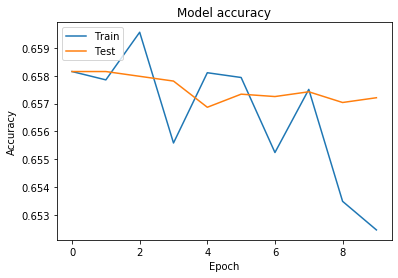

In [252]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

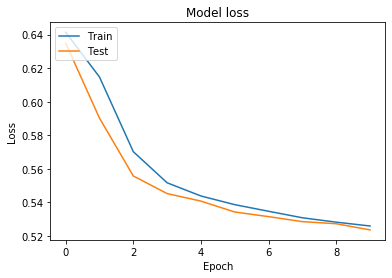

In [253]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()